# **Fashion_Mnist_Project_Using_Convolutional_Neural_Network**

**Import Libraries**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import keras

**Load Data**

In [2]:
(x_train, y_train), (x_test, y_test) =tf.keras.datasets.fashion_mnist.load_data()

**Shapes Of Train & Test Data Sets**

In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

**Show Images**

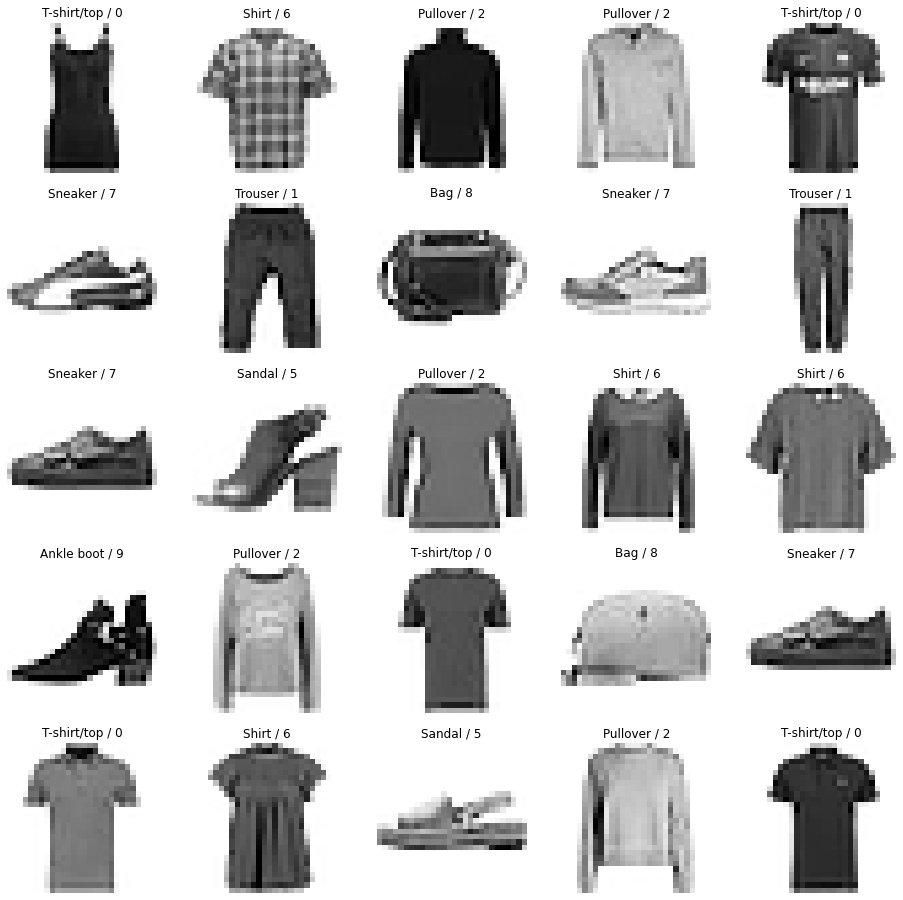

In [4]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(x_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

**Change Dimension**

In [5]:
x_train.ndim

3

In [6]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [7]:
x_train.ndim

4

**Feature Scaling**

In [8]:
x_train = x_train/255.
x_test = x_test/255.

# **Build CNN Model**

In [9]:
#Building CNN model
cnn_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

**Compile The Model**

In [10]:
cnn_model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

**Fit The Model**

In [11]:
cnn_model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 46s 24ms/step - loss: 0.3869 - accuracy: 0.8633
Epoch 2/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2615 - accuracy: 0.9050
Epoch 3/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2177 - accuracy: 0.9188
Epoch 4/20
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1863 - accuracy: 0.9307
Epoch 5/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1587 - accuracy: 0.9410
Epoch 6/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1340 - accuracy: 0.9503
Epoch 7/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1124 - accuracy: 0.9581
Epoch 8/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0950 - accuracy: 0.9644
Epoch 9/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0805 - accuracy: 0.9701
Epoch 10/20
1875/1875 [==============================] - 40s 21m

**Test and Evaluate The Model**

In [16]:
y_pred = cnn_model.predict(x_test)

In [17]:
cnn_model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.5569 - accuracy: 0.9153


[0.5569306015968323, 0.9153000116348267]

**Visualize The Output**

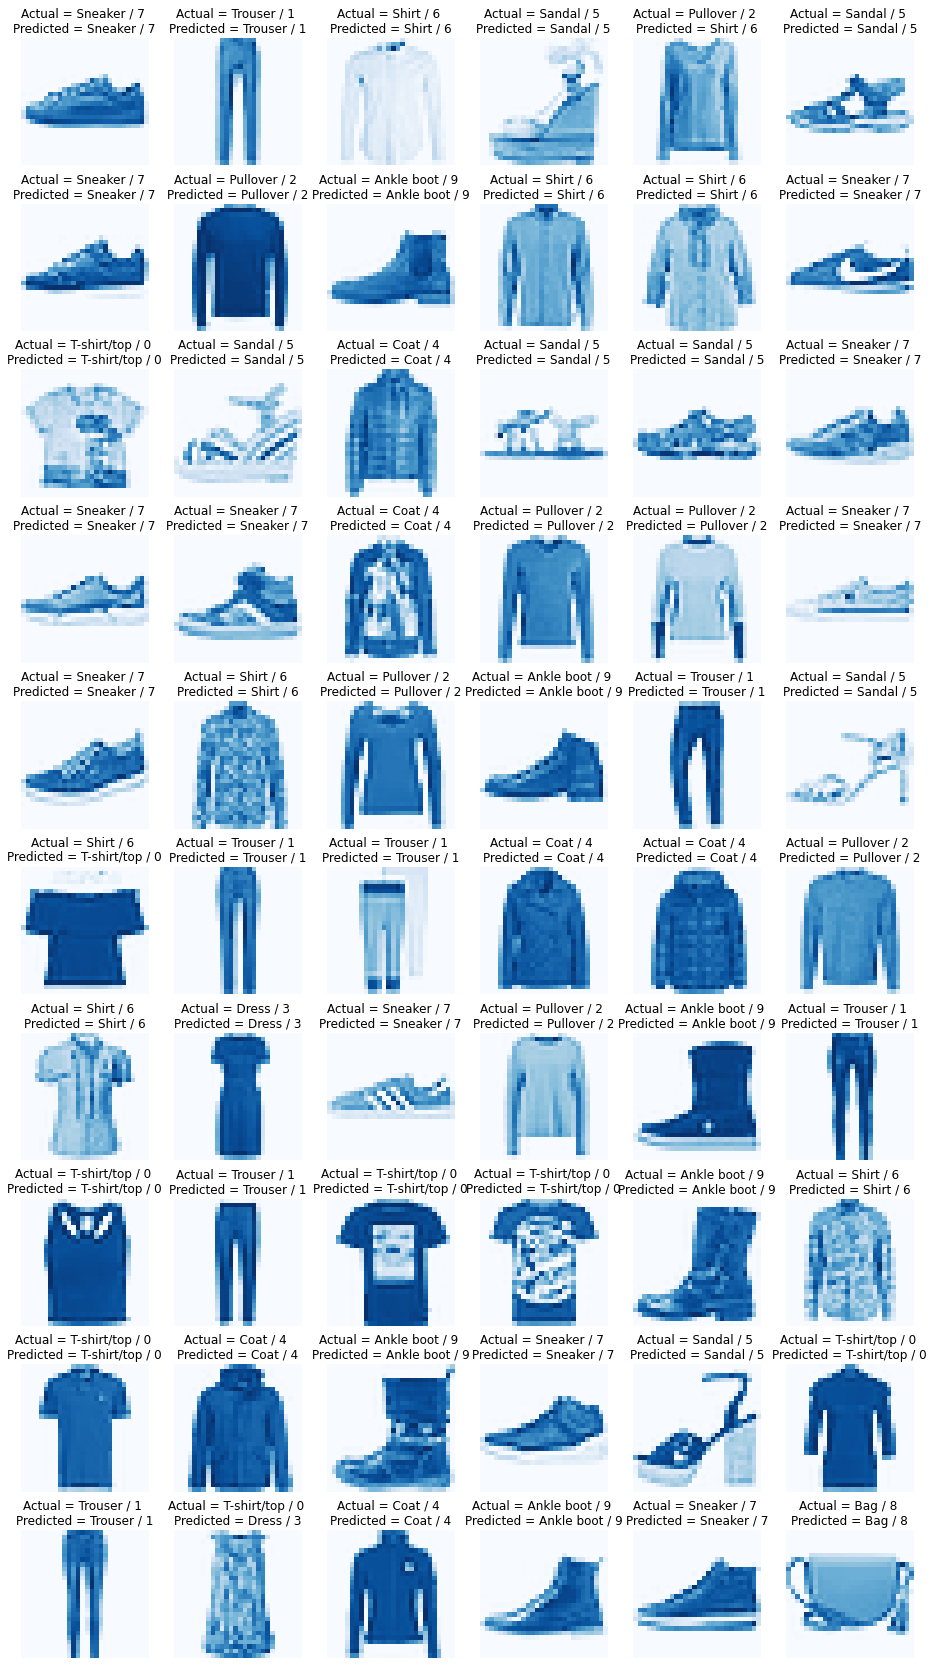

In [18]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(x_test[i].reshape(28,28), cmap = 'Blues')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

**Make Confusion Matrix**

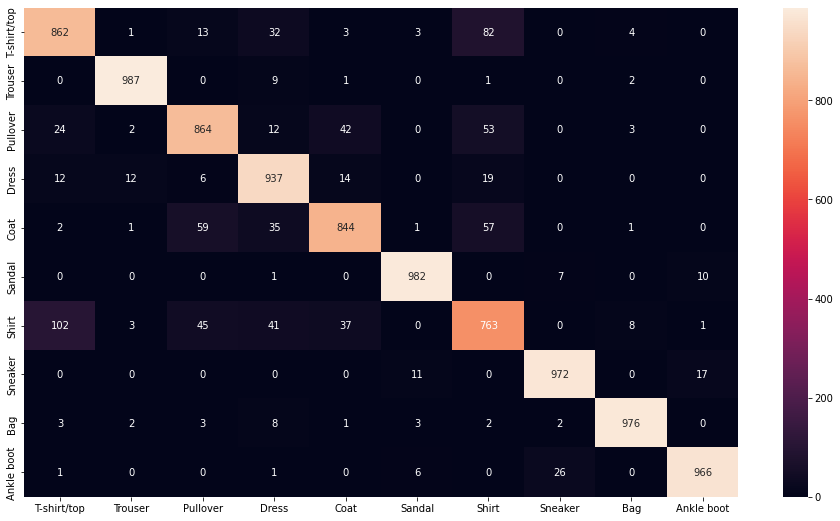

In [19]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

# show cm 
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

**Make Classification Report**

In [20]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.86      0.86      1000
     Trouser       0.98      0.99      0.98      1000
    Pullover       0.87      0.86      0.87      1000
       Dress       0.87      0.94      0.90      1000
        Coat       0.90      0.84      0.87      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.78      0.76      0.77      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



**Save The Model**

In [21]:
cnn_model.save('Fashion_Mnist_Project_Using_Convolutional_Neural_Network')

INFO:tensorflow:Assets written to: Fashion_Mnist_Project_Using_Convolutional_Neural_Network/assets


**Load The Saved Model**

In [22]:
loaded_model = tf.keras.models.load_model('Fashion_Mnist_Project_Using_Convolutional_Neural_Network')

**Comparison**

In [24]:
cnn_model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.5569 - accuracy: 0.9153


[0.5569306015968323, 0.9153000116348267]

In [25]:
loaded_model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.5569 - accuracy: 0.9153


[0.5569306015968323, 0.9153000116348267]